<a href="https://colab.research.google.com/github/ashishpatel26/tcn-keras-Examples/blob/master/TCN_Self_generated_Data_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load dataset

In [4]:
!pip install keras-tcn

     |████████████████████████████████| 378kB 3.8MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
import numpy as np
from tcn import compiled_tcn

### Dataset Generation

In [11]:
batch_size=1024
sequence_length=32
# input image dimensions
pos_indices = np.random.choice(batch_size, size=int(batch_size // 2), replace=False)

x_train = np.zeros(shape=(batch_size, sequence_length))
print(f"X_train shape: {x_train.shape}")
y_train = np.zeros(shape=(batch_size, 1))
print(f"y_train shape:{y_train.shape}")
x_train[pos_indices, 0] = 1.0
y_train[pos_indices, 0] = 1.0

# y_train = to_categorical(y_train, num_classes=2)

print("After expanding the dimension shape is like this...!!!")
x_train = np.expand_dims(x_train, axis=2)
y_train = y_train.copy()
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape:{y_train.shape}")

X_train shape: (1024, 32)
y_train shape:(1024, 1)
After expanding the dimension shape is like this...!!!
X_train shape: (1024, 32, 1)
y_train shape:(1024, 1)


### Model Design

In [13]:
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=10,
                         kernel_size=10,
                         dilations=[1, 2, 4, 8, 16, 32],
                         nb_stacks=6,
                         max_len=x_train[0:1].shape[1],
                         use_skip_connections=False)
model.summary()

x.shape= (None, 10)
model.x = (None, 32, 1)
model.y = (None, 10)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 1)]           0         
_________________________________________________________________
tcn (TCN)                    (None, 10)                71840     
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 71,950
Trainable params: 71,950
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 4s 116ms/step - loss: 4.7999 - accuracy: 0.8525
Epoch 2/10
32/32 [==============================] - 4s 121ms/step - loss: 0.0022 - accuracy: 0.9990
Epoch 3/10
32/32 [==============================] - 4s 119ms/step - loss: 6.4029e-05 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 4s 120ms/step - loss: 6.0811e-05 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 4s 118ms/step - loss: 1.1593e-04 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 4s 119ms/step - loss: 1.0923e-05 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 4s 122ms/step - loss: 7.6293e-06 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 4s 125ms/step - loss: 2.6019e-04 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 4s 120ms/step - loss: 4.6707e-05 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 4s 123ms/step - los

In [15]:
result = model.evaluate(x_train, y_train)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

32/32 [==============================] - 1s 41ms/step - loss: 1.1921e-07 - accuracy: 1.0000
Accuracy : 100.00 %
Loss : 0.00 %


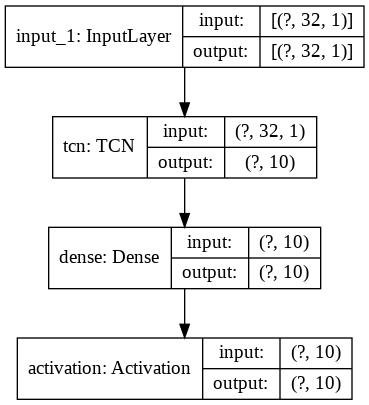

In [16]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

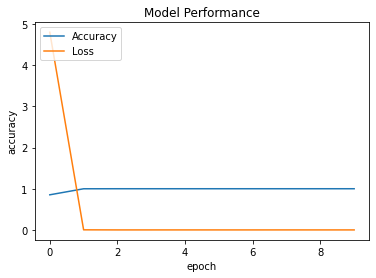

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
lt.show()

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


Cohens kappa: 1.000000
ROC AUC: 1.000000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       512
         1.0       1.00      1.00      1.00       512

    accuracy                           1.00      1024
   macro avg       1.00      1.00      1.00      1024
weighted avg       1.00      1.00      1.00      1024



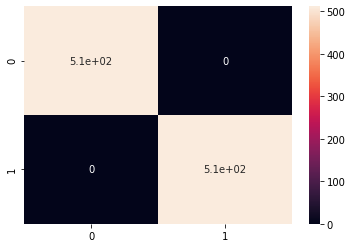

In [31]:
# predict probabilities for test set
yhat_probs = np.argmax(model.predict(x_train, verbose=0), axis=1)
 
# kappa
kappa = cohen_kappa_score(y_train, yhat_probs)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_train, yhat_probs)
print('ROC AUC: %f' % auc)

print(classification_report(y_train, yhat_probs))
# confusion matrix
matrix = confusion_matrix(y_train, yhat_probs)
sns.heatmap(matrix, annot=True)